In [49]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm_notebook


In [33]:
T = 20 
L = 1000 # Length of signal
N = 100 # Batch size

## Generate sin wave

In [38]:
def generate_sin_wave():
    np.random.seed(2)
    x = np.empty((N, L), 'int64')
    # Make sampling, add same random number for all length of n'th instance of batchsize
    # That random number will be different for each instance of batch, which produces different
    # sinusoidal instances
    x = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
    data = np.sin(x / 1.0 / T).astype('float64')
    return data

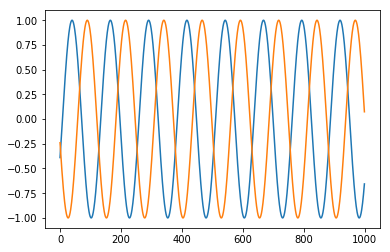

In [37]:
plt.plot(data[1])
plt.plot(data[2])
plt.show()

STEP:  0
loss: 0.5023738122475343
loss: 0.4985663937943548
loss: 0.47901196061153817
loss: 0.44633490214842186
loss: 0.3540631025749383
loss: 0.20507016617680748
loss: 1.3960531561167067
loss: 0.03249441148471868
loss: 0.029934875839601752
loss: 0.028326821011534383
loss: 0.02683061221882407
loss: 0.0237712019899893
loss: 0.01890141350454438
loss: 0.010646818233205705
loss: 0.008725752090268452
loss: 0.007872181287777006
loss: 0.005477842749594466
loss: 0.004051933564063721
loss: 0.00272962270115915
loss: 0.0015402652769809198
test loss: 0.0013000876156955736


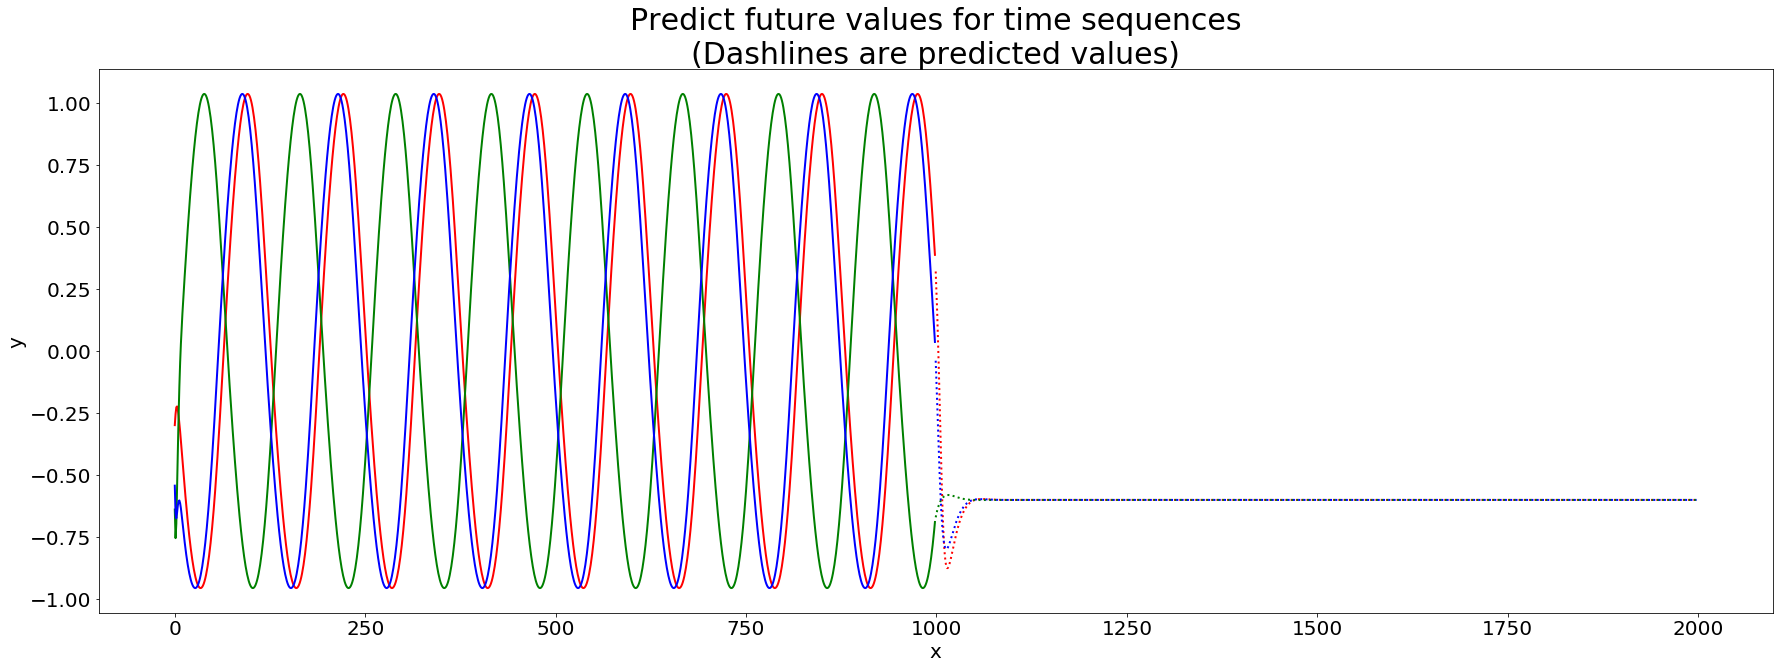

STEP:  1
loss: 0.001279764616782744
loss: 0.0011690554954717814
loss: 0.0011498916013727228
loss: 0.0011288245291281199
loss: 0.0010630561341024938
loss: 0.0009564006443282378
loss: 0.0008210827589983114
loss: 0.0007670796029145983
loss: 0.0007294716423578554
loss: 0.0007246558169811128
loss: 0.0007206211393648758
loss: 0.0007126686053106909
loss: 0.0006961310498769072
loss: 0.0006641101811541825
loss: 0.0006101210702276014
loss: 0.0005285228387102186
loss: 0.0004127250710282221
loss: 0.0003302157945217843
loss: 0.00031217121493986786
loss: 0.0003235219220598921
test loss: 0.0001700511289510078


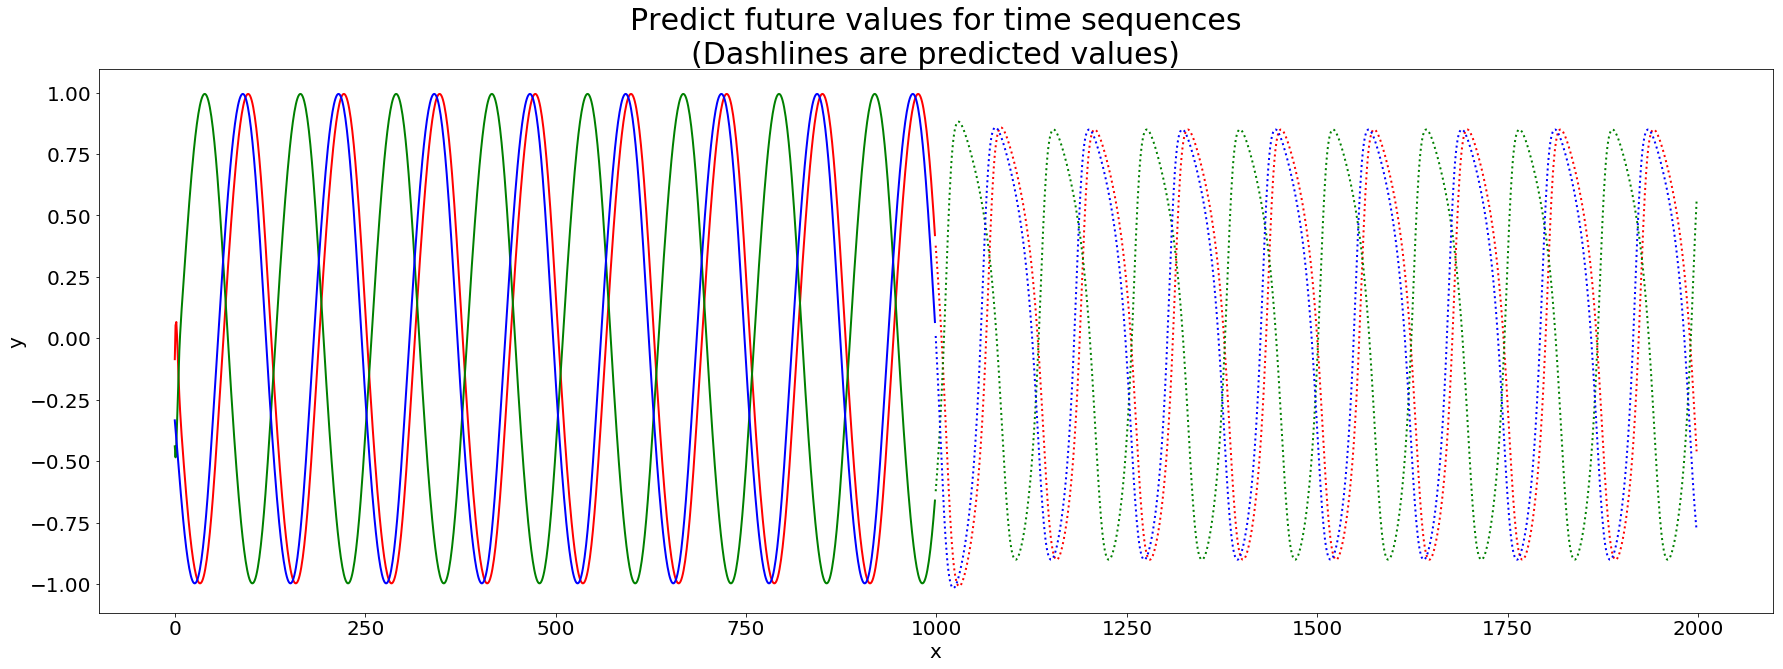

STEP:  2
loss: 0.00030530789272769515
loss: 0.00030414965836448617
loss: 0.0003035129747820953
loss: 0.00030276531287184923
loss: 0.0003010321390065406
loss: 0.00029744084426455453
loss: 0.0002907608911645237
loss: 0.00028094788597934136
loss: 0.0002682227137288714
loss: 0.00025221919695767356
loss: 0.00023920222327922244
loss: 0.00022590525893516952
loss: 0.00022719613064821733
loss: 0.0002080202140741461
loss: 0.00020050239660586975
loss: 0.0001914949230987481
loss: 0.00018777715169068633
loss: 0.00018122790437989956
loss: 0.00017671387789870233
loss: 0.0001696035509748194
test loss: 6.615079324224645e-05


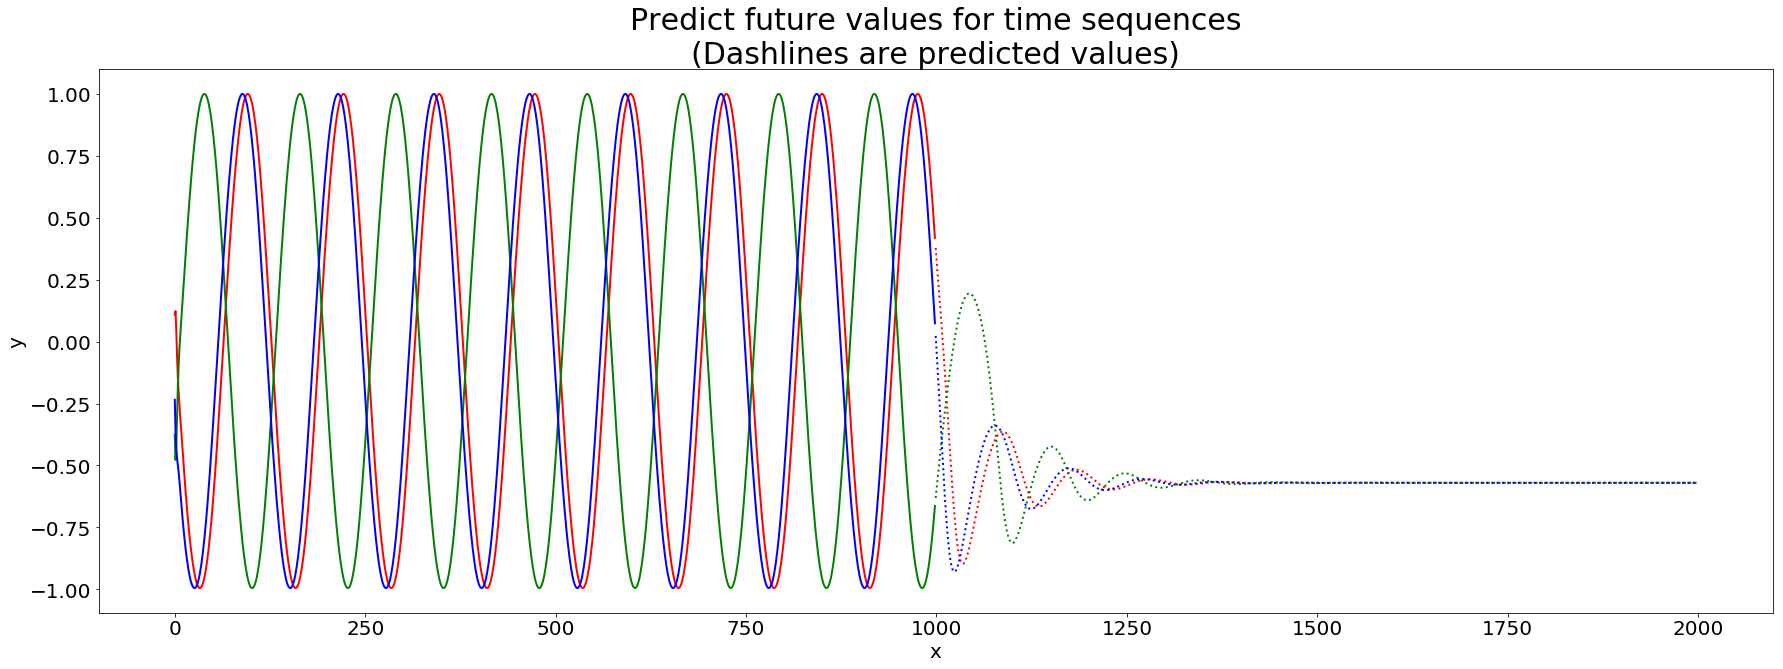

STEP:  3
loss: 0.00016001388198474693
loss: 0.00015376838500273177
loss: 0.00015156060440442418
loss: 0.0001518614235118514
loss: 0.00015115942793606725
loss: 0.0001510288421354787
loss: 0.00015083292548488423
loss: 0.0001507063219246078
loss: 0.00015045822237509608
loss: 0.00015005142517008713
loss: 0.00014972513291313093
loss: 0.00014902970115701785
loss: 0.00014791091920656737
loss: 0.0001459247470602958
loss: 0.00014239608688850584
loss: 0.0001377504545382045
loss: 0.00012341360026842208
loss: 0.00010522420852568653
loss: 0.0001259832705172795
loss: 0.00010584099838167225
test loss: 4.079810232775309e-05


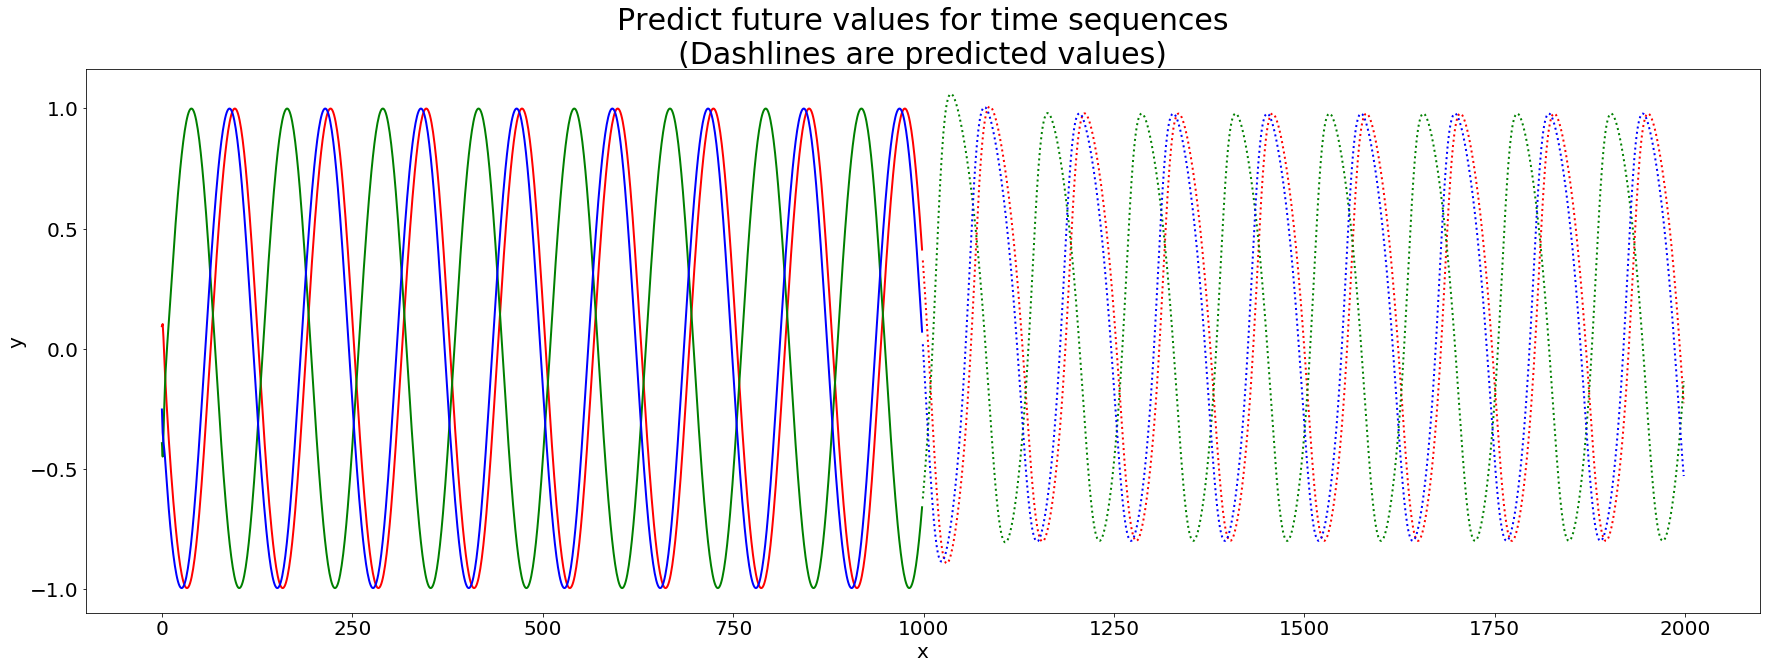

STEP:  4
loss: 9.140770605060364e-05
loss: 8.852362575845239e-05
loss: 8.404065488377843e-05
loss: 7.908644951553656e-05
loss: 7.640386302614205e-05
loss: 7.338809892772461e-05
loss: 7.153853988380924e-05
loss: 7.106763748116057e-05
loss: 7.068615255422076e-05
loss: 7.055590747308372e-05
loss: 7.051953983936302e-05
loss: 7.048190486781027e-05
loss: 7.016759712491698e-05
loss: 6.959172438028536e-05
loss: 6.871309875662655e-05
loss: 6.76028475733078e-05
loss: 6.273043341577021e-05
loss: 5.7853685003378113e-05
loss: 0.0001994589668849902
loss: 5.61066118507909e-05
test loss: 7.005106289068974e-05


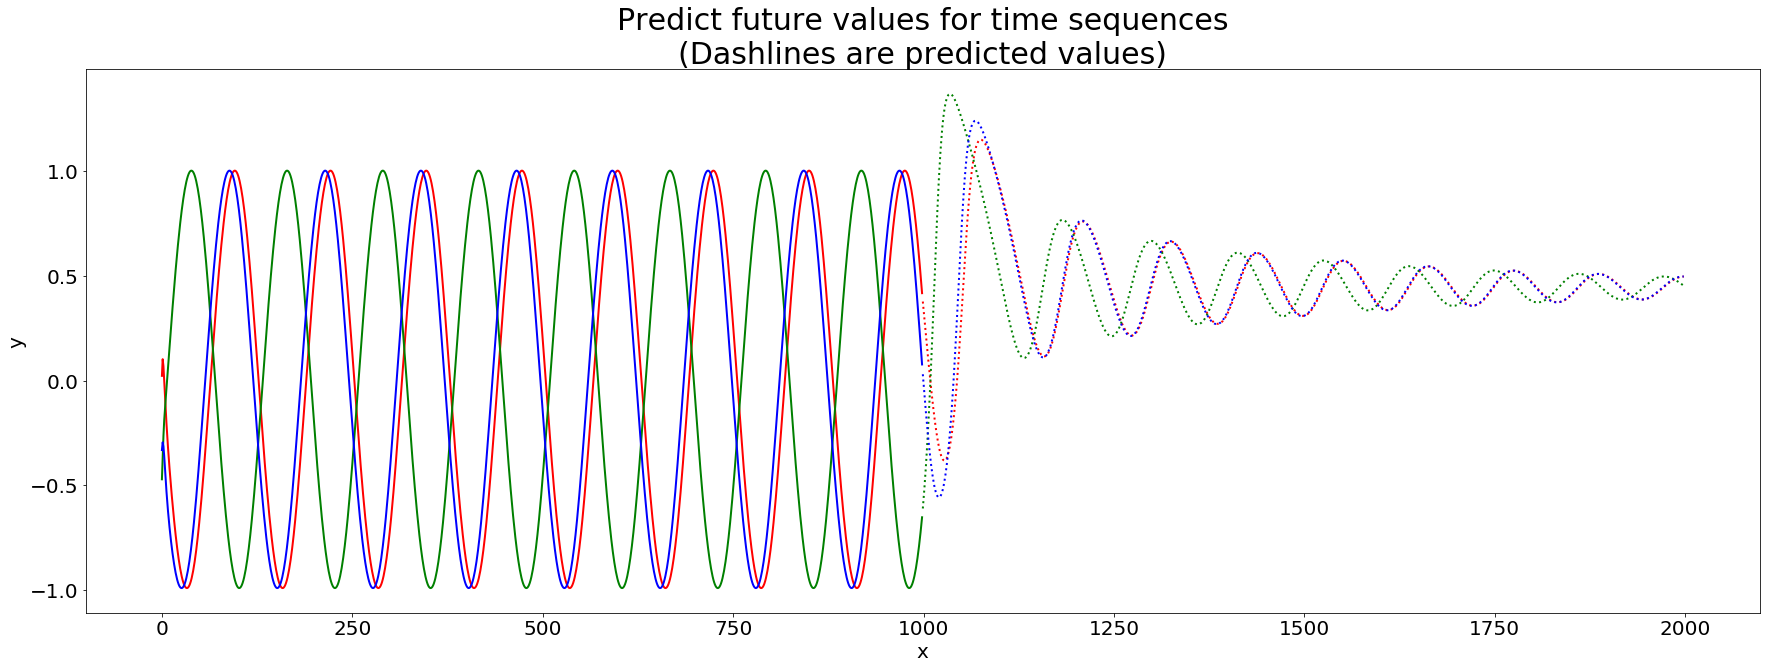

STEP:  5
loss: 7.668819769927098e-05
loss: 4.2972743894163094e-05
loss: 3.680063257005674e-05
loss: 3.4533776039532416e-05
loss: 2.961608272180913e-05
loss: 2.8451237112187658e-05
loss: 2.7148062003872958e-05
loss: 2.5132351935799814e-05
loss: 2.4122958736244437e-05
loss: 2.3902500928430323e-05
loss: 2.37673988085386e-05
loss: 2.374798768608559e-05
loss: 2.3704456011670243e-05
loss: 2.366366467134519e-05
loss: 2.3584750570108476e-05
loss: 2.3386492628959113e-05
loss: 2.3096629569017914e-05
loss: 2.2898323405034178e-05
loss: 2.2636864365438858e-05
loss: 2.1955439352031474e-05
test loss: 2.4828678767214086e-05


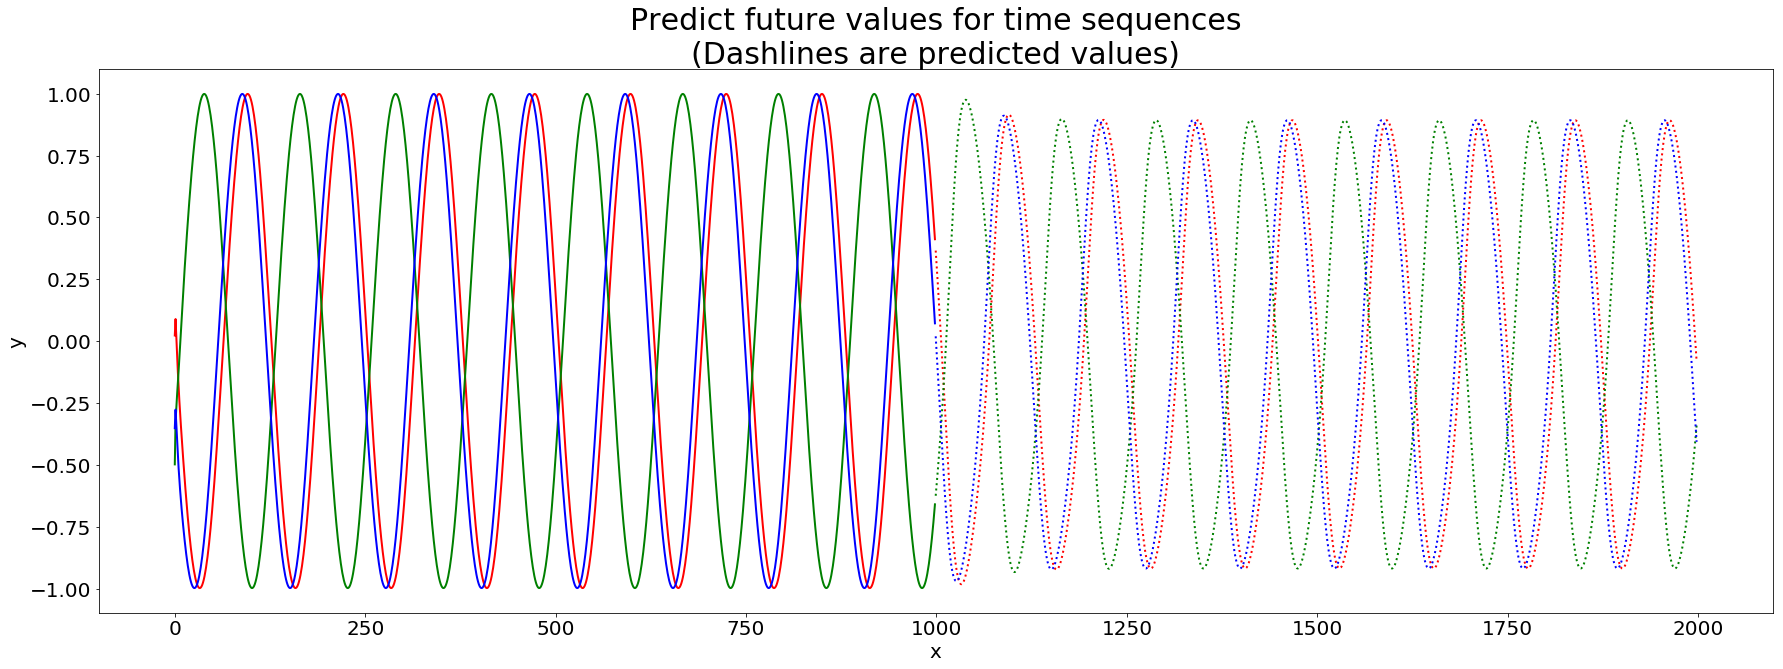

STEP:  6
loss: 2.0194358484963506e-05
loss: 1.860206311390755e-05
loss: 1.7682369540373075e-05
loss: 1.710713231339156e-05
loss: 1.690511890258249e-05
loss: 1.6845367159804434e-05
loss: 1.6830003674953086e-05
loss: 1.6820614100464007e-05
loss: 1.6768868405862708e-05
loss: 1.606896883272325e-05
loss: 1.5363199049851087e-05
loss: 1.4723547157394072e-05
loss: 1.4183621915459345e-05
loss: 1.3748324481192495e-05
loss: 1.3529840732805211e-05
loss: 1.3411629556551582e-05
loss: 1.3290882509163593e-05
loss: 1.3204428796071371e-05
loss: 1.3147694916102284e-05
loss: 1.312184935450301e-05
test loss: 1.4211998191490156e-05


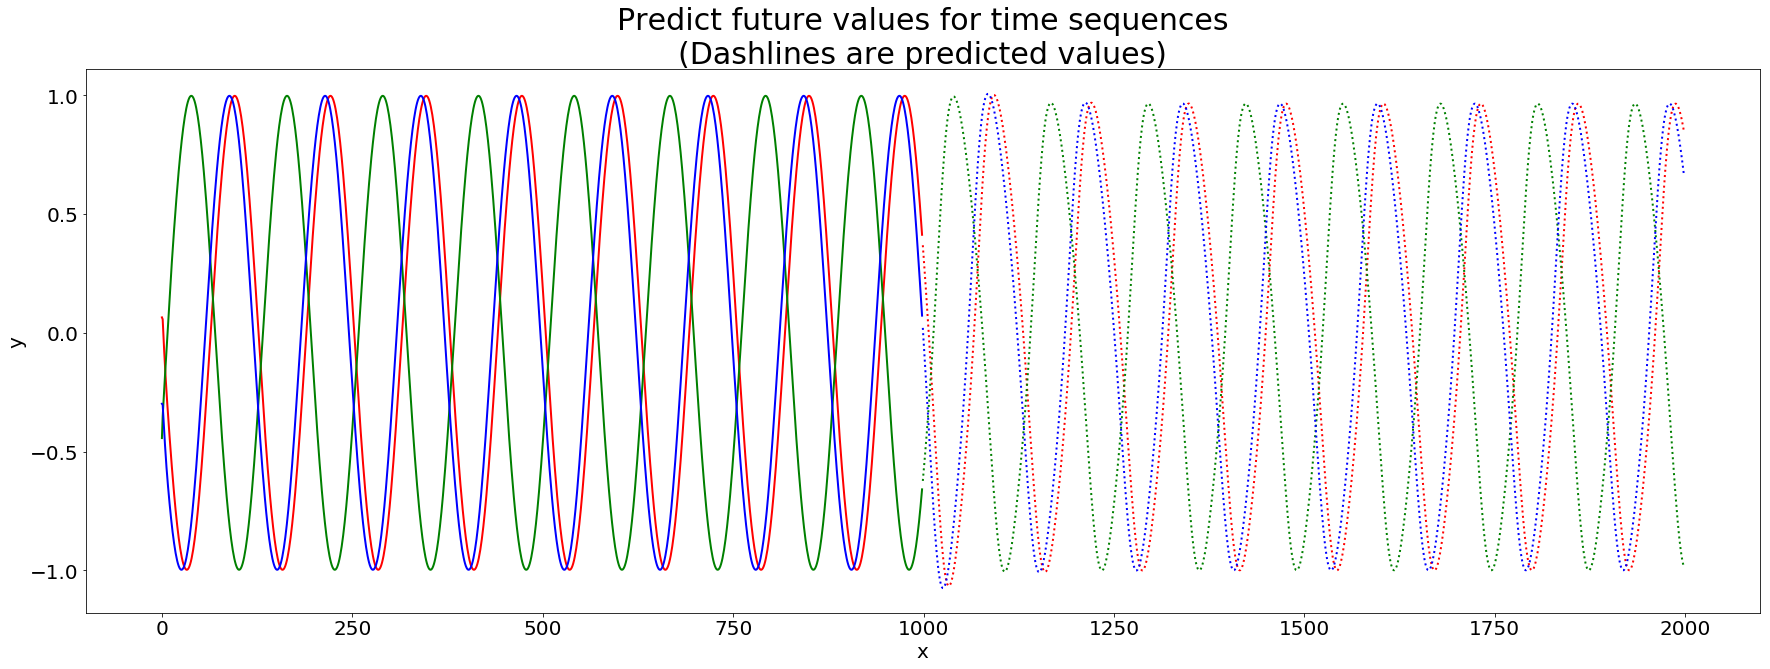

STEP:  7
loss: 1.3115460600680923e-05
loss: 1.3091270498004262e-05
loss: 1.3037359686827098e-05
loss: 1.2961604758888224e-05
loss: 1.2848625881623509e-05
loss: 1.2619564505785513e-05
loss: 1.214212832391851e-05
loss: 1.1454926229726098e-05
loss: 1.0863952221146872e-05
loss: 1.0105025736922668e-05
loss: 9.68922372850943e-06
loss: 8.728585271654066e-06
loss: 8.267548018075859e-06
loss: 7.712726672219527e-06
loss: 7.448664672256698e-06
loss: 7.218096292150488e-06
loss: 7.109843403712788e-06
loss: 7.049724910559405e-06
loss: 7.027559889360605e-06
loss: 7.022220228204752e-06
test loss: 9.399522637872236e-06


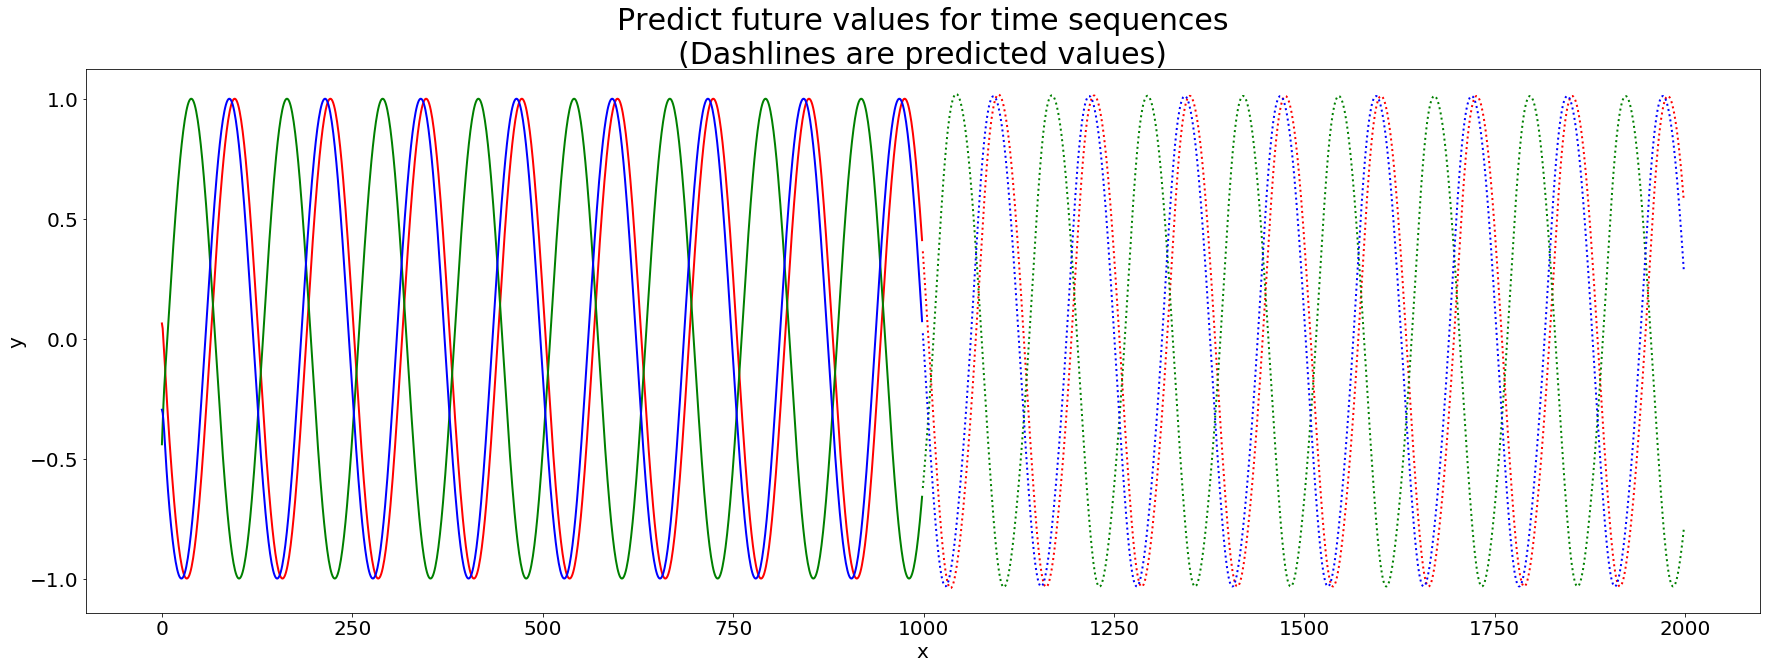

STEP:  8
loss: 7.019330325312131e-06
loss: 7.017269464710625e-06
loss: 7.013054701589127e-06
loss: 7.0108750634928545e-06
loss: 7.008649739457871e-06
loss: 7.00552576762056e-06
loss: 7.000784477950087e-06
loss: 6.991923978711069e-06
loss: 6.9683054715776975e-06
loss: 6.914489872960032e-06
loss: 6.811923696638175e-06
loss: 6.615300321682859e-06
loss: 6.784395935357396e-06
loss: 6.767883092993027e-06
loss: 6.503241962752759e-06
loss: 6.287635691821301e-06
loss: 6.1616789706080345e-06
loss: 6.086520591350696e-06
loss: 5.99508152433442e-06
loss: 5.927773319569184e-06
test loss: 7.749255439295861e-06


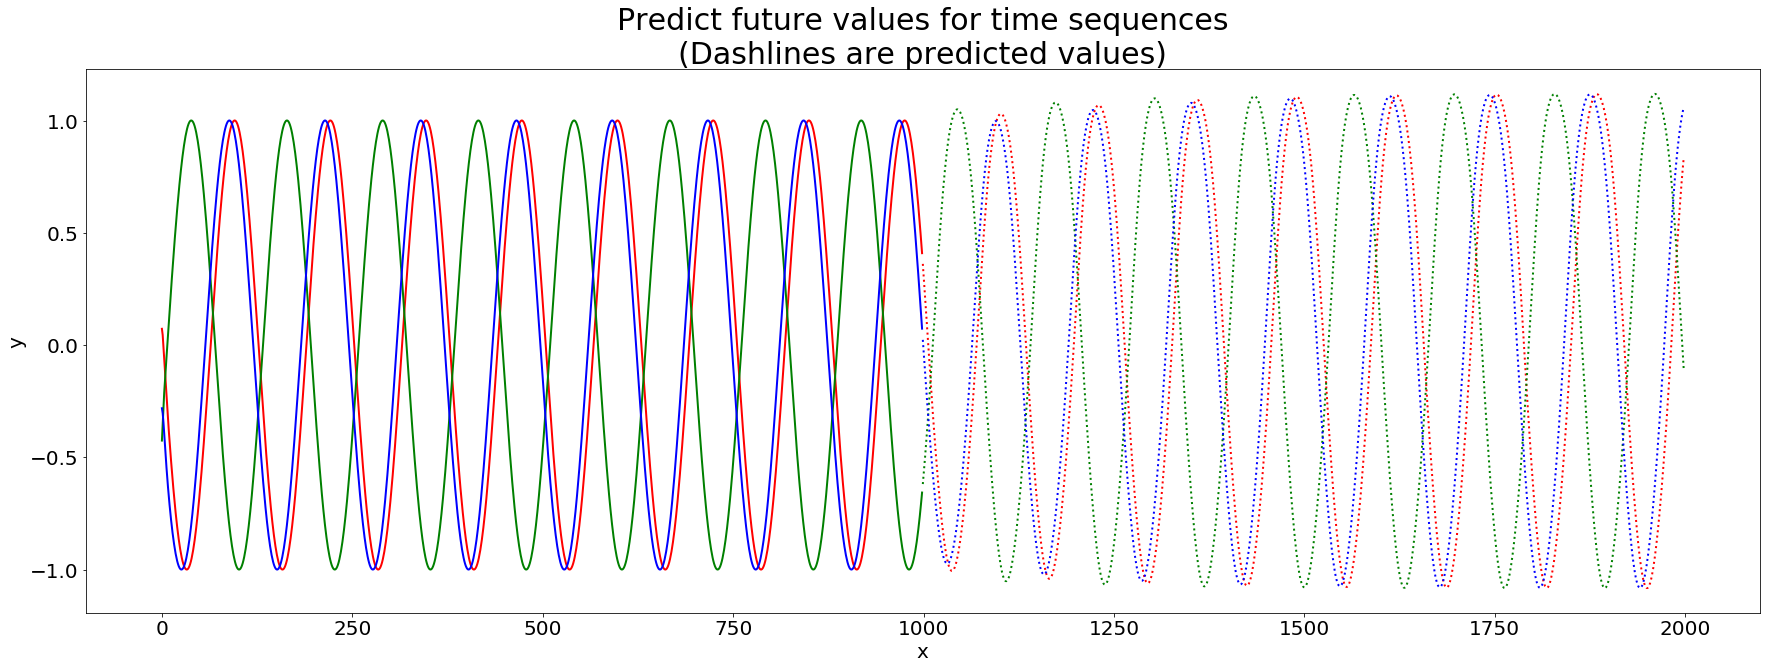

STEP:  9
loss: 5.851552074760343e-06
loss: 5.845104182154333e-06
loss: 5.790854614711033e-06
loss: 5.772179137676512e-06
loss: 5.7631089619615905e-06
loss: 5.765755458557244e-06
loss: 5.74092513332095e-06
loss: 5.736503230536055e-06
loss: 5.725496802230494e-06
loss: 5.7185373216207385e-06
loss: 5.7094331815055405e-06
loss: 5.6894939647797955e-06
loss: 5.6374934343692305e-06
loss: 5.5192862697446655e-06
loss: 5.633756623438837e-06
loss: 2.3910963252923934e-05
loss: 5.788308363524774e-06
loss: 6.403548775273375e-06
loss: 5.3927409174355885e-06
loss: 5.326481046277614e-06
test loss: 7.1675250467714e-06


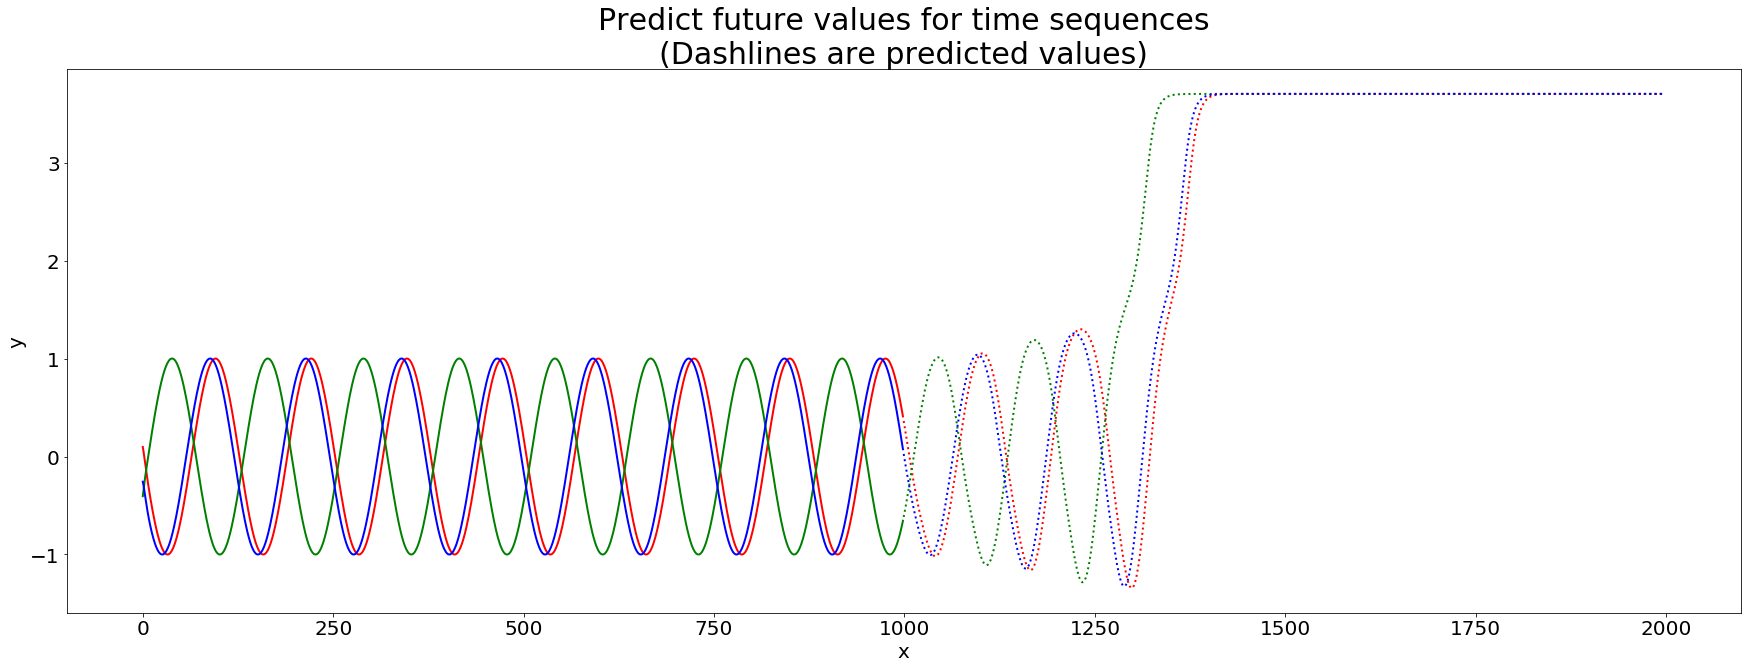

STEP:  10
loss: 5.3015701458443654e-06
loss: 5.250672734341921e-06
loss: 5.209773199636577e-06
loss: 5.143845169035081e-06
loss: 5.077319476961647e-06
loss: 5.002561163844958e-06
loss: 4.874064144804338e-06
loss: 4.782922840210705e-06
loss: 4.750716325818132e-06
loss: 4.731248503384105e-06
loss: 4.715556187790259e-06
loss: 4.700864848624128e-06
loss: 4.682804146872602e-06
loss: 4.6698508752997215e-06
loss: 4.64988090003546e-06
loss: 4.6327047751390944e-06
loss: 4.619377629721777e-06
loss: 4.606391058497854e-06
loss: 4.592949836208921e-06
loss: 4.5674181584727415e-06
test loss: 7.1952443759007245e-06


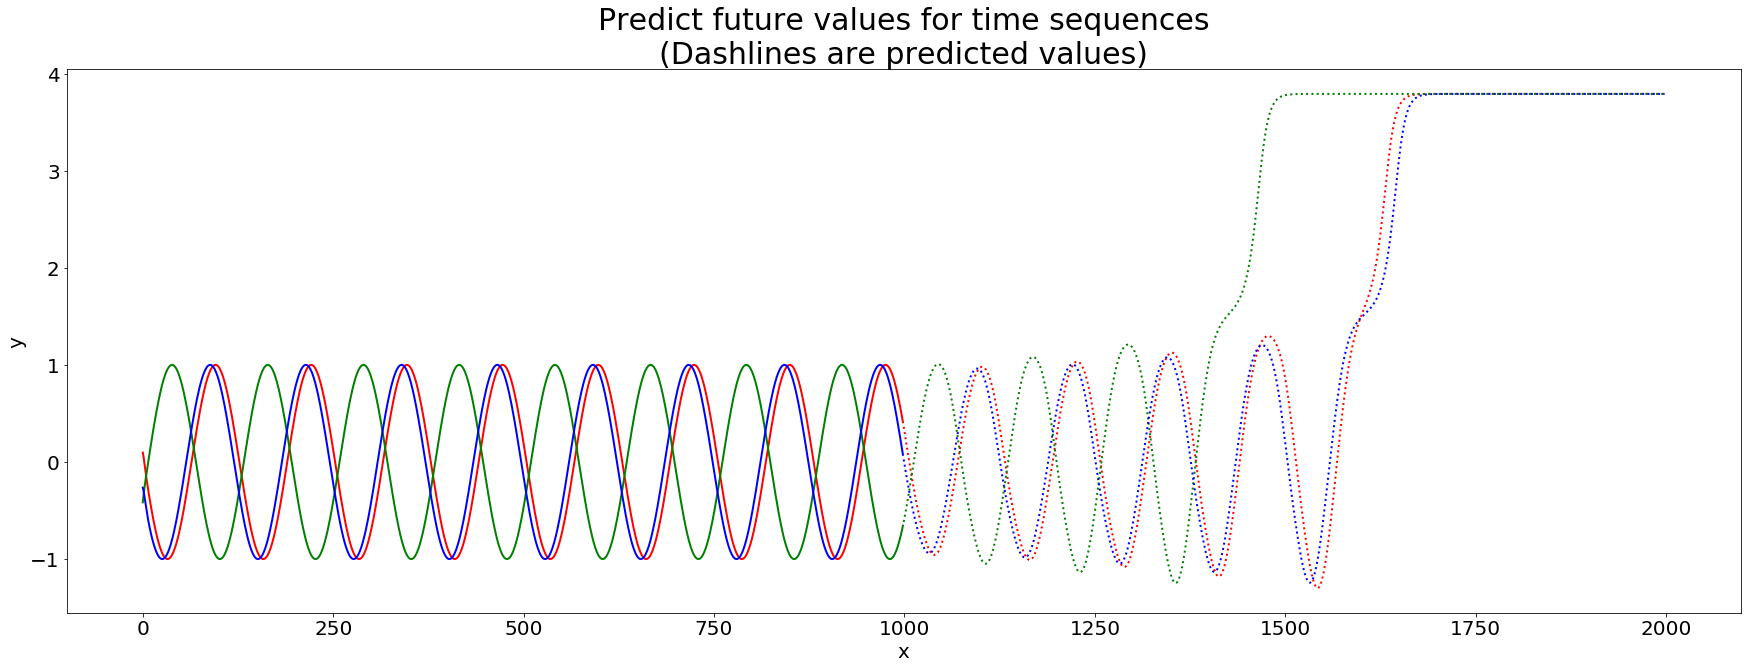

STEP:  11
loss: 4.5505440333514076e-06
loss: 4.540333242484677e-06
loss: 4.529336638130271e-06
loss: 4.510932060681688e-06
loss: 4.506192283805118e-06
loss: 4.501761074727635e-06
loss: 4.496887457668687e-06
loss: 4.49404154324877e-06
loss: 4.491951154819033e-06
loss: 4.488706540119854e-06
loss: 4.4823767738155834e-06
loss: 4.470122381682678e-06
loss: 4.4632972955020925e-06
loss: 4.439185566762888e-06
loss: 4.416877042362012e-06
loss: 4.386113509922526e-06
loss: 4.365828599073369e-06
loss: 4.365175581018805e-06
test loss: 7.31765758193774e-06


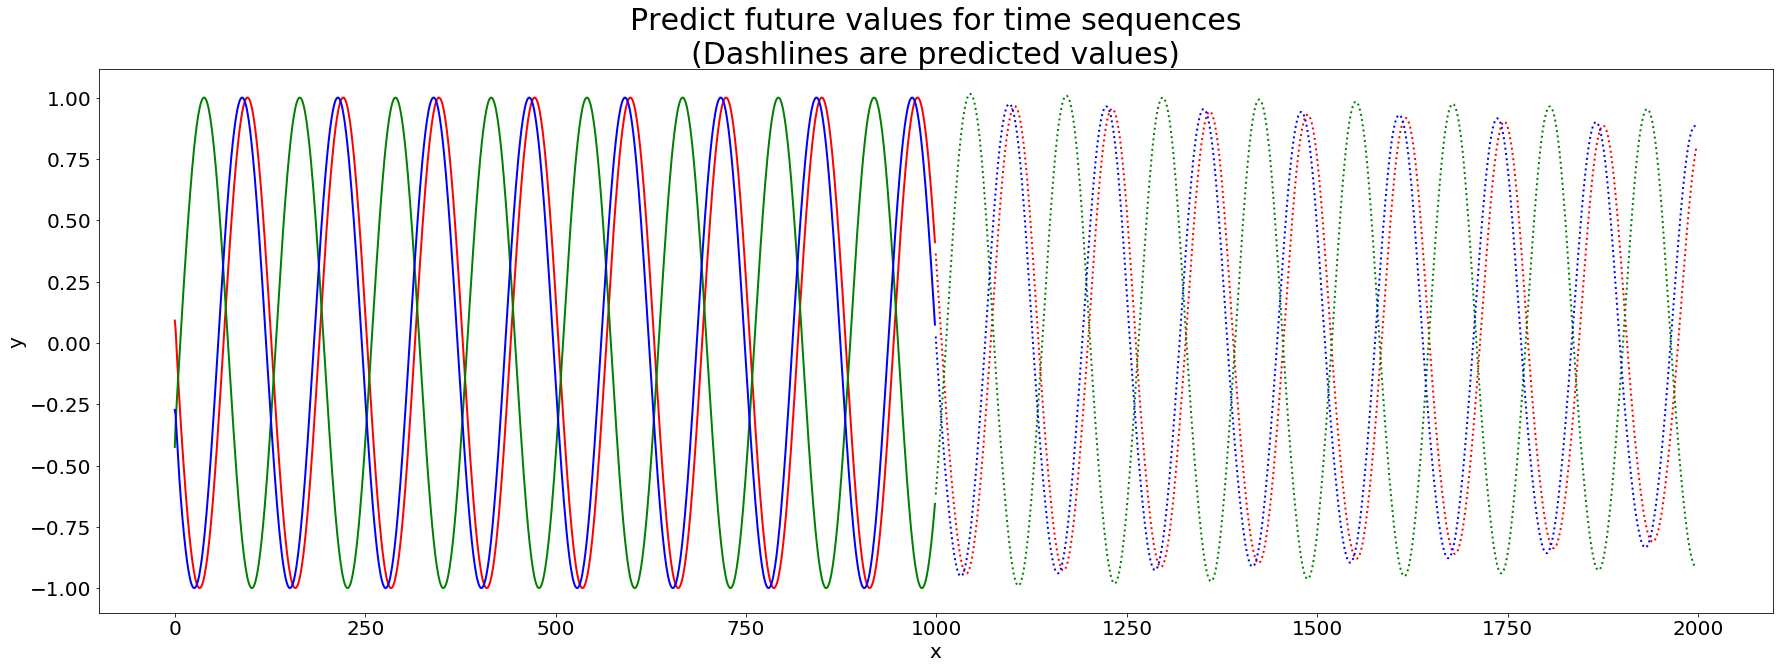

STEP:  12
loss: 4.365175581018805e-06
loss: 4.364284832485563e-06
test loss: 7.296098722347619e-06


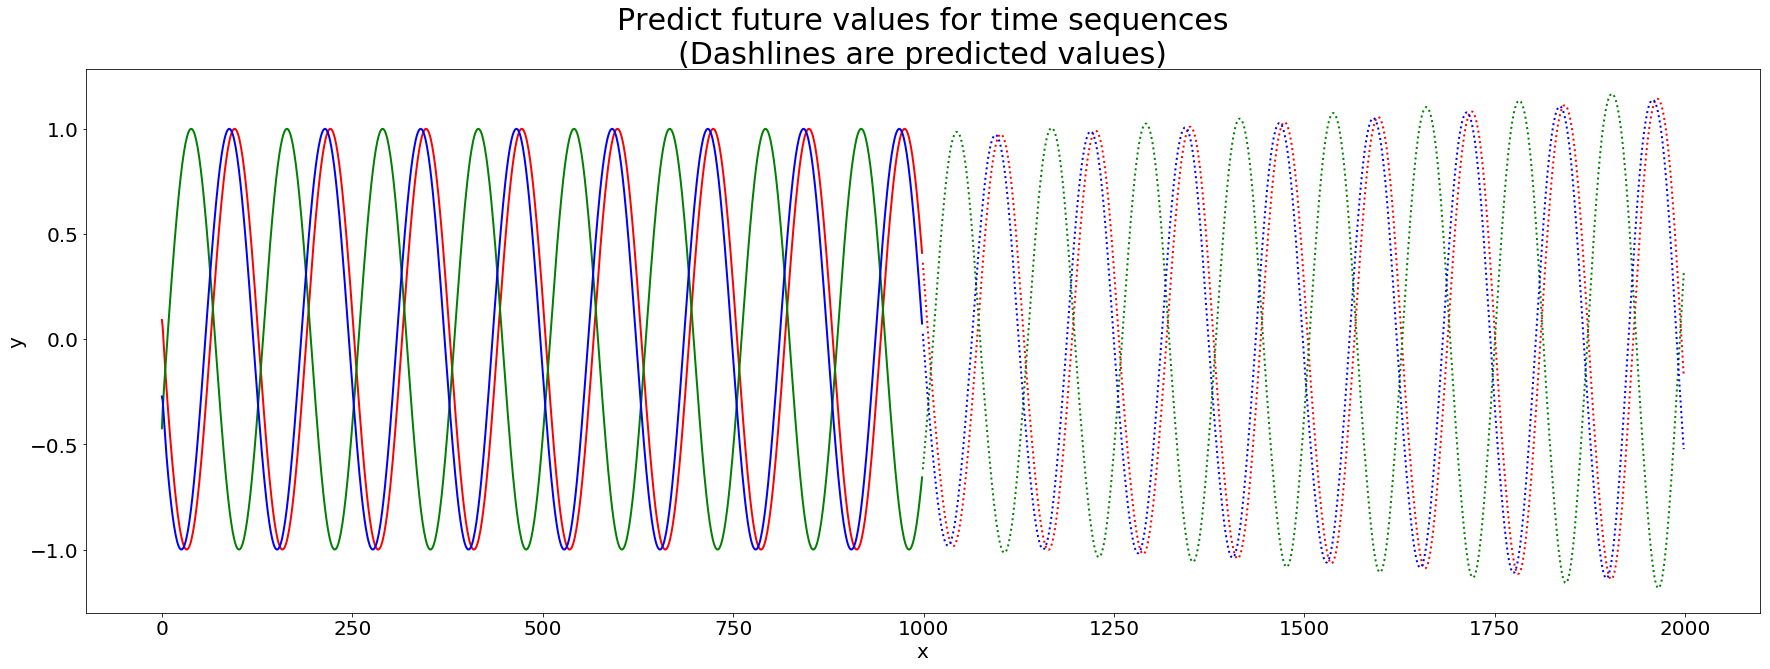

STEP:  13
loss: 4.364284832485563e-06
loss: 4.3507454490288115e-06
loss: 4.339312548863659e-06
loss: 4.337386753720831e-06
loss: 4.335897125516211e-06
loss: 4.334822325025581e-06
loss: 4.333084473601191e-06
loss: 4.330763746251177e-06
loss: 4.3280632411463445e-06
loss: 4.324795217187279e-06
loss: 4.32046170302741e-06
loss: 4.318088945020323e-06
loss: 4.31450357394575e-06
loss: 4.310067436024403e-06
loss: 4.29646864439373e-06
loss: 4.284958524412101e-06
loss: 4.2608966211795605e-06
loss: 4.219867693587762e-06
loss: 4.1819316245244355e-06
loss: 4.148034795620301e-06
test loss: 6.757446409955744e-06


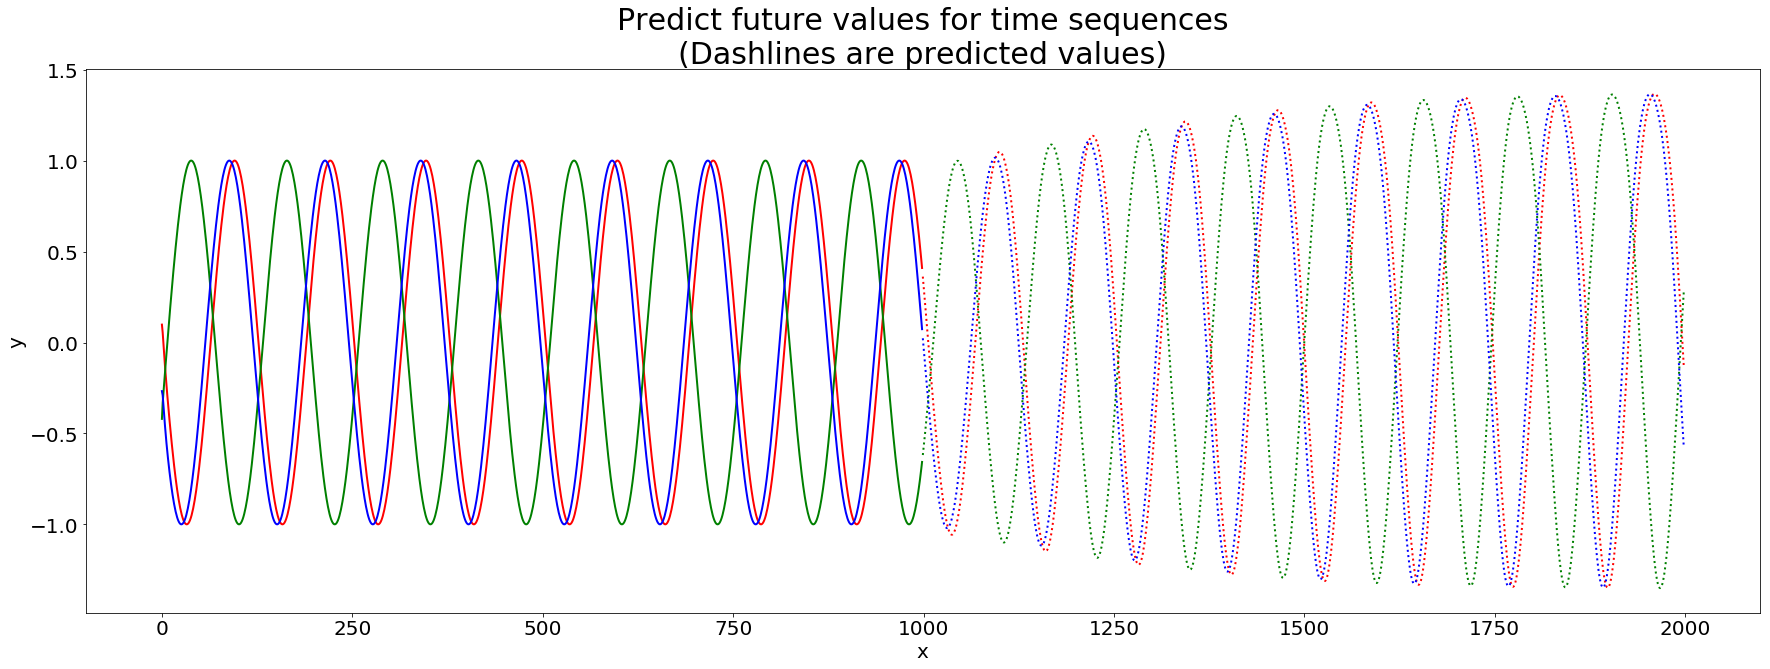

STEP:  14
loss: 4.1270281950452506e-06
loss: 4.09484186916052e-06
loss: 4.145630727134244e-06
loss: 4.022024780157111e-06
loss: 3.997954028533012e-06
loss: 3.976908727179374e-06
loss: 3.952660751312096e-06
loss: 3.919928972893855e-06
loss: 3.877838066427999e-06
loss: 3.8640098849998864e-06
loss: 3.8409167920706145e-06
loss: 3.835780451926965e-06
loss: 3.829133310400626e-06
loss: 3.8254986920251365e-06
loss: 3.824497583398193e-06
loss: 3.824166366398676e-06
test loss: 6.512498515287473e-06


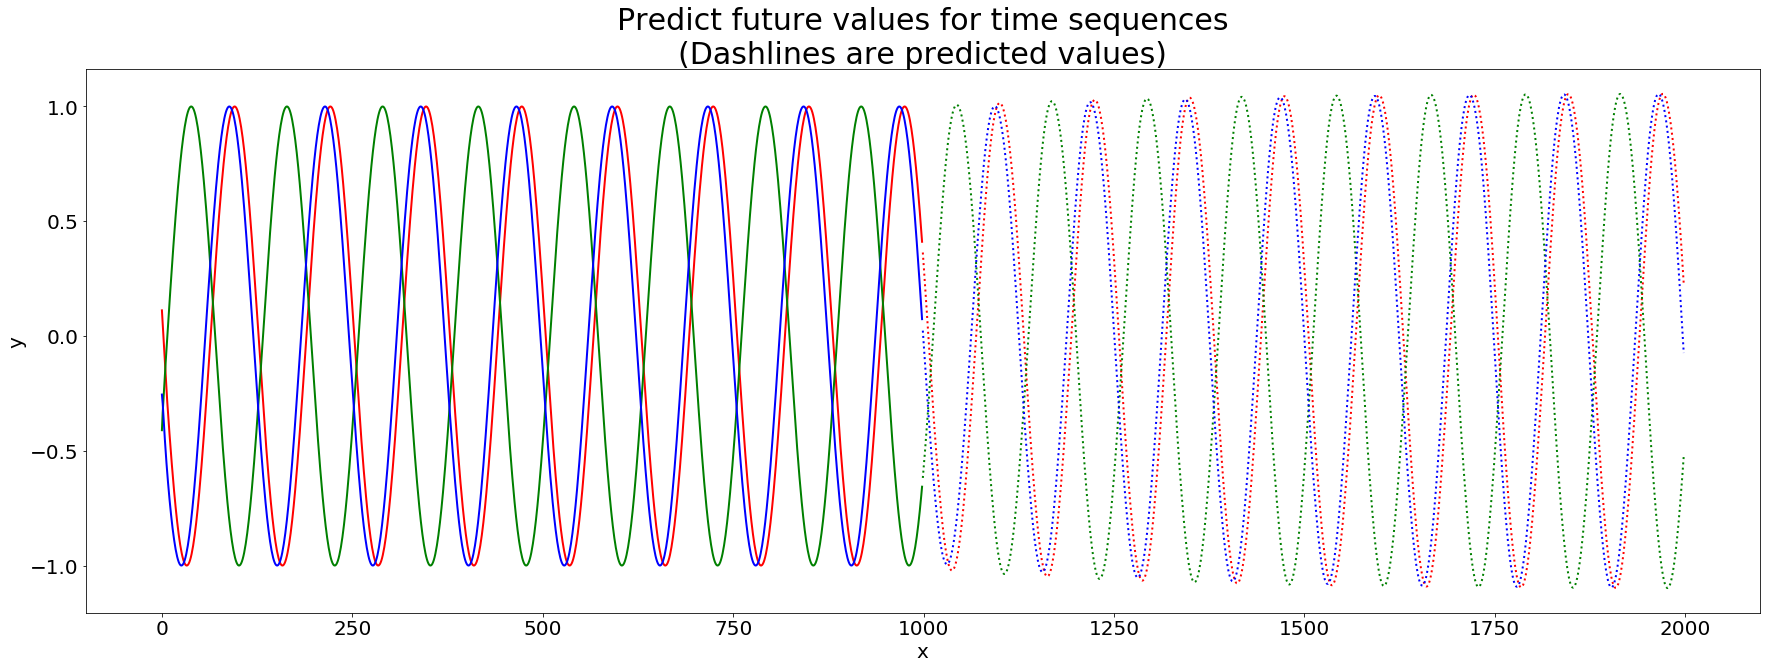

In [53]:
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTMCell(1, 51)
        self.lstm2 = nn.LSTMCell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, trn_input, future = 0):
        outputs = []
        h_t = torch.zeros(trn_input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(trn_input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(trn_input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(trn_input.size(0), 51, dtype=torch.double)

        for i, trn_input_t in enumerate(trn_input.chunk(trn_input.size(1), dim=1)):
            h_t, c_t = self.lstm1(trn_input_t, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        for i in range(future):# if we should predict the future
            h_t, c_t = self.lstm1(output, (h_t, c_t))
            h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t2)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs


if __name__ == '__main__':
    # set random seed to 0
    np.random.seed(0)
    torch.manual_seed(0)
    # load data and make training set
    data = generate_sin_wave()
    trn_input = torch.from_numpy(data[3:, :-1])
    target = torch.from_numpy(data[3:, 1:])
    test_input = torch.from_numpy(data[:3, :-1])
    test_target = torch.from_numpy(data[:3, 1:])
    # build the model
    seq = Sequence()
    seq.double()
    criterion = nn.MSELoss()
    # use LBFGS as optimizer since we can load the whole data to train
    optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
    #begin to train
    for i in tqdm_notebook(range(15)):
        print('STEP: ', i)
        def closure():
            optimizer.zero_grad()
            out = seq(trn_input)
            loss = criterion(out, target)
            print('loss:', loss.item())
            loss.backward()
            return loss
        optimizer.step(closure)
        # begin to predict, no need to track gradient here
        with torch.no_grad():
            future = 1000
            pred = seq(test_input, future=future)
            loss = criterion(pred[:, :-future], test_target)
            print('test loss:', loss.item())
            y = pred.detach().numpy()
        # draw the result
        plt.figure(figsize=(30,10))
        plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('y', fontsize=20)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        def draw(yi, color):
            plt.plot(np.arange(trn_input.size(1)), yi[:trn_input.size(1)], color, linewidth = 2.0)
            plt.plot(np.arange(trn_input.size(1), trn_input.size(1) + future), yi[trn_input.size(1):], color + ':', linewidth = 2.0)
        draw(y[0], 'r')
        draw(y[1], 'g')
        draw(y[2], 'b')
        plt.show()
